In [58]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import time 
import matplotlib.pyplot as plt


# Section 1

### task A:

![![alt text](https://)](image.png)

### task B:

In [ ]:
class Neuron: 
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate
    
    def activate(self, stimulus):
        pass

class Sensory_Neuron(Neuron):
    def __init__(self, firing_rate, receptor_type):
        super(). __init__(firing_rate)
        self.receptor_type = receptor_type 
       
    def Sense_Stimulus(self):
         #process the specific stimulus it is sensitive to using the attribute receptor_type
         #call super to use exsisting activate function
         super.activate(self, self.receptor_type)
         pass
    
class Motor_Neuron(Neuron):
    def __init__(self, firing_rate, target_muscle):
        super(). __init__(firing_rate)
        self.target_muscle = target_muscle

    def Control_Muscle(self):
        pass

class Photoreceptor(Sensory_Neuron):
    def __init__(self, firing_rate, receptor_type):
        super(). __init__(firing_rate)
        self.receptor_type = "light"

    def Light_detection(self, light_intensity):
        #analize given light level
        #call super to activate
        super.activate(self, self.receptor_type)
        pass

class Mechanoreceptor(Sensory_Neuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = "pressure"

    def Pressure_Detection(self, pressure):
        #analize given pressure level
        #call super to activate
        super.activate(self, self.receptor_type)
        #if activated, firing_rate++
        pass

class Alpha_Motor_Neuron(Motor_Neuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = "skeletal muscle"

    def Skeletal_muscle_control(self):
        super.activate(self, self.target_muscle)
        #measure activation level
        #accordingly, initiates muscle contraction or movement
        pass

class Gamma_Motor_Neuron(Motor_Neuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = "muscle spindle"

    def Muscle_spindle_control(self):
        super.activation(self, self.target_muscle)
        #measure activation level
        #accordingly, adjusts muscle spindle tension in response
        pass

# Section 2:

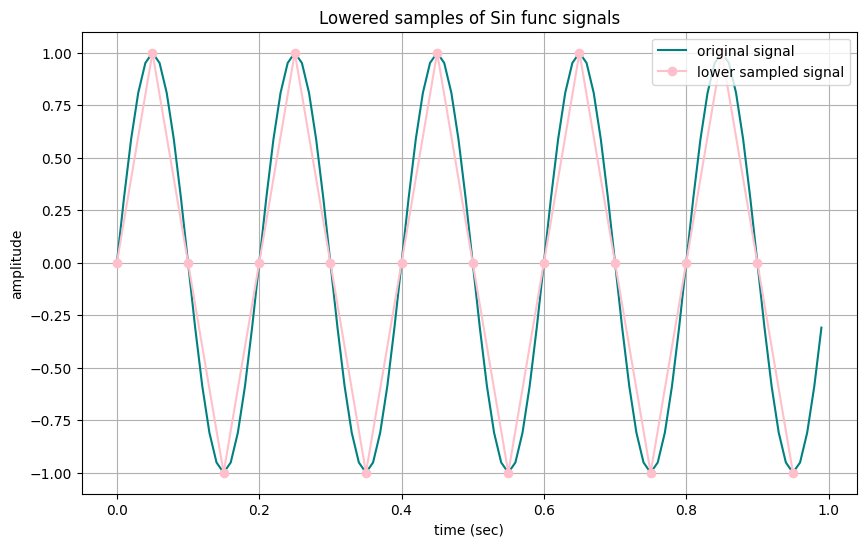

In [60]:
def lower_sin_signal(signal_array):
    #find max and min points
    #calc the diff between each 2 consecutive array indexes values.
    diff_signal = np.diff(signal_array)
    #if the sign turns over, it means the slope turned from positive to negative
    #or the other way around, which means theres a max\min point
    sign_diff_signal = np.sign(diff_signal)
    calc_slope = np.diff(sign_diff_signal)

    #find max points: slope(up)->slope(down)
    max_slope_change = calc_slope < 0 

    #find max points indecies
    max_indicies = max_slope_change.nonzero()[0]

    #add 1 to the indecies to match original index in signal array
    max_indicies = max_indicies + 1  

    #find min points
    min_slope_change = calc_slope > 0
    min_indices = min_slope_change.nonzero()[0]
    min_indices = min_indices + 1

    #combine min and max points and sort by val
    combined_indices = np.sort(np.concatenate((max_indicies, min_indices)))
    
    #select each fifth point
    lower_sampled_indices = np.arange(0, len(signal_array), 5)

    #combine lower, max and min samples 
    total_indices = np.unique(np.concatenate((lower_sampled_indices, combined_indices)))

    #extract lower sampled signal
    lower_sampled_indices = signal_array[total_indices]

    return lower_sampled_indices, total_indices

#generate sin signal
frequency = 5
sample_every = 0.01

#generate time vector (for 1 sec)
time = np.arange(0, 1, sample_every)
original_signal = np.sin(2 * np.pi * frequency * time)

#lower the signal and scan returned values inside two arguments
lower_sampled_signal, lower_sampled_indices = lower_sin_signal(original_signal)

#plot original and lower sampled sin signals
plt.figure(figsize=(10,6))
plt.plot(time, original_signal, label="original signal", color="teal")
plt.plot(time[lower_sampled_indices], lower_sampled_signal, 'o-', label="lower sampled signal", color="pink")
plt.title("Lowered samples of Sin func signals")
plt.xlabel("time (sec)")
plt.ylabel("amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Section 3

### task 1:

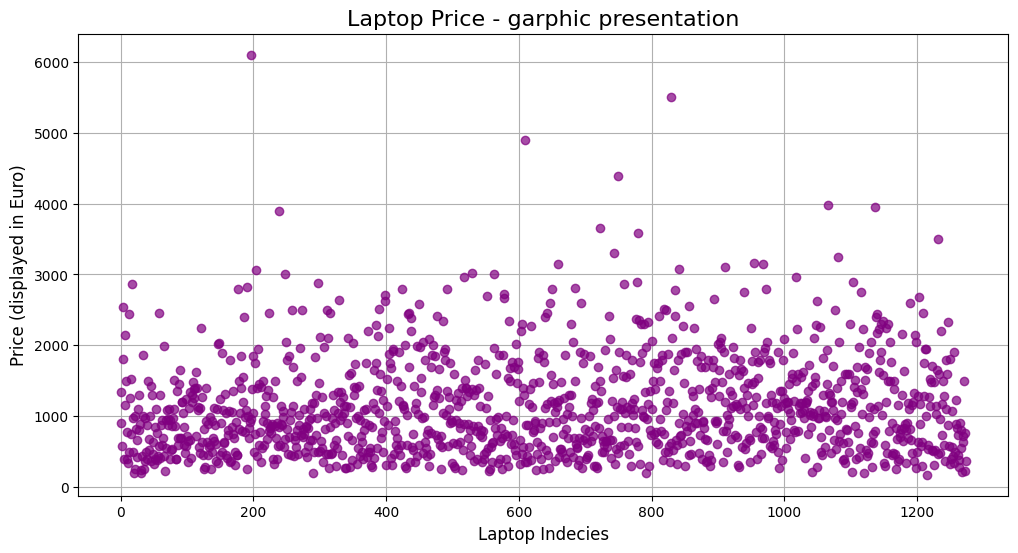

In [ ]:
#rading given data
file_path = "laptop_price - dataset.csv"
data = pd.read_csv(file_path)

#draw laptop prices 
plt.figure(figsize=(12, 6))
plt.plot(data['Price (Euro)'], marker='o',linestyle='', color='purple', alpha=0.7)

#using titles and lables to ensure the graph is readable
plt.title("Laptop Price - garphic presentation", fontsize=16)
plt.xlabel("Laptop Indecies", fontsize=12)
plt.ylabel("Price (displayed in Euro)", fontsize=12)
plt.grid(True)

#printing graph
plt.show()

### task 2:

Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


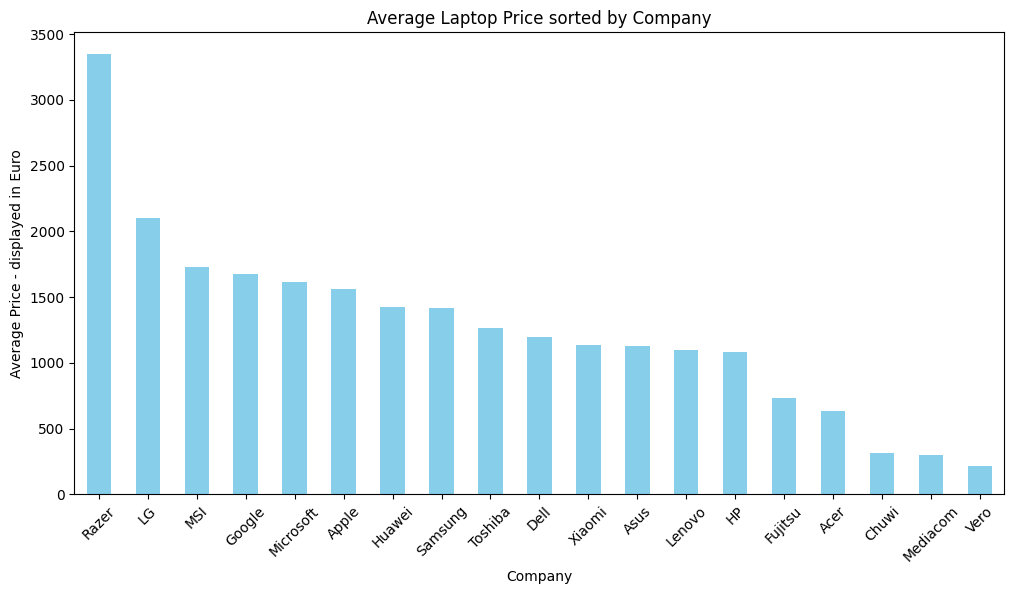

In [ ]:
#group data by companies and calc the mean price
grouped_data = data.groupby('Company')['Price (Euro)']

#calc the average price for each company
average_price = grouped_data.mean()

#sort results from highest to lowest
sorted_avg_prices = average_price.sort_values(ascending=False)

#test - make sure the values are sorted before inserting it to the graph
print(sorted_avg_prices)

#draw a bar graph shows the average price per company 
plt.figure(figsize=(12, 6))
sorted_avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Laptop Price sorted by Company')
plt.xlabel('Company')
plt.ylabel('Average Price - displayed in Euro')
plt.xticks(rotation=45)
plt.show()

### task 3:

In [ ]:
#making OS names uniform
#convert caps->lowercase, delete extra spaces
data['OpSys'] = data['OpSys'].str.strip().str.lower() 
#create a dictionary shows which OS names sould turn to differente ones 
#treat 'windows 7' and  'windows 10' as twp different OS
data['OpSys'] = data['OpSys'].replace({'win10': 'windows 10', 'win7': 'windows 7', 'mac os x': 'macos', 'windows 10 s':'windows 10'})

#extract and print unique operating systems
unique_os = data['OpSys'].unique()
print(f"Unique Operating Systems: {unique_os}")
#print datas first 5 rows to make sure column changed correctly 
data.head()


Unique Operating Systems: ['macos' 'no os' 'windows 10' 'linux' 'android' 'chrome os' 'windows 7']


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macos,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macos,1.34,898.94,FlashStorage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,no os,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macos,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macos,1.37,1803.60,SSD


### task 4:

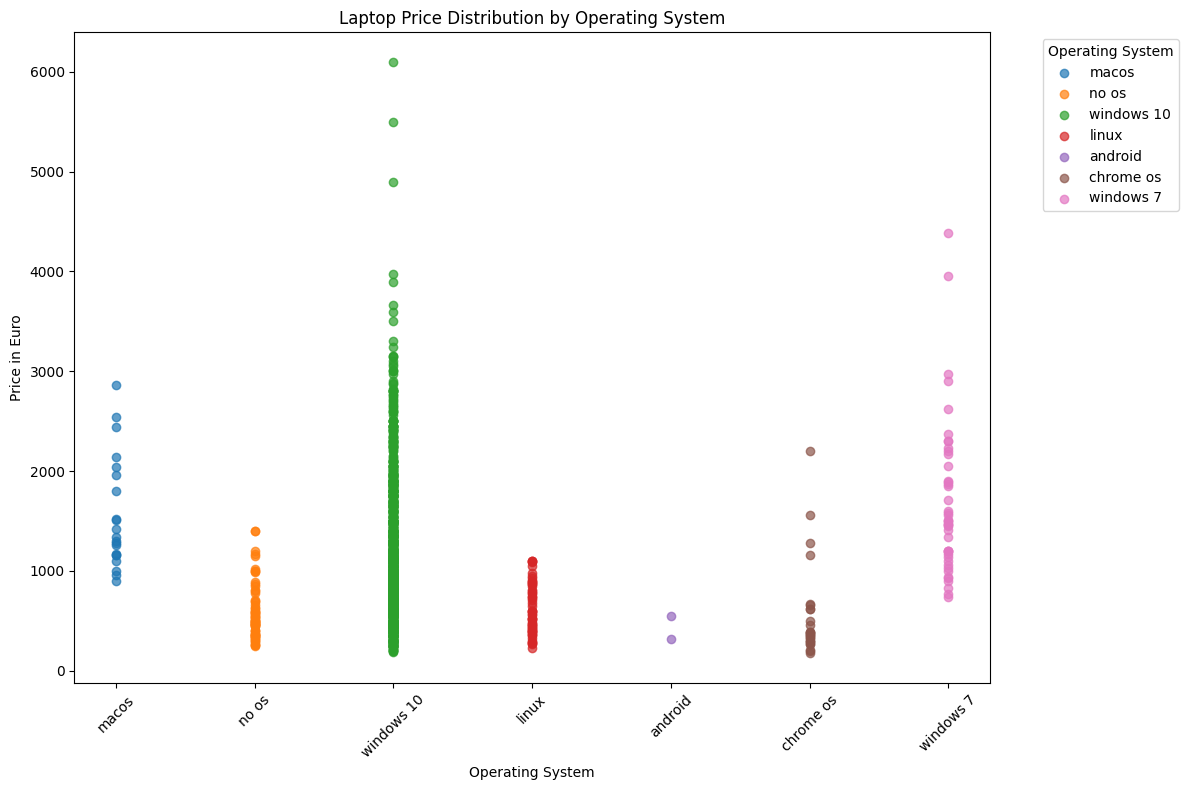

In [111]:
plt.figure(figsize=(12, 8))

#match a numeric value to each OS
#seperate unque operation systems
os_names = data['OpSys'].unique()
#match a numeric value 
os_positions = range(len(os_names)) 

#draw a graph in which each laptop has a scatter point
for i in os_positions:
    os = os_names[i]
    os_prices = data[data['OpSys'] == os]['Price (Euro)'] 
    plt.scatter([i] * len(os_prices), os_prices, label=os, alpha=0.7) 

#add titles and lables tomake the graph readable 
plt.title('Laptop Price Distribution by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Price in Euro')

#sync x-axis ticks to match psitions and lables 
plt.xticks(ticks=os_positions, labels=os_names, rotation=45)

#create a legend to ease readability, made sure to place outside of the graph itself
plt.legend(title='Operating System', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()

#draw graph
plt.show()


### task 5:

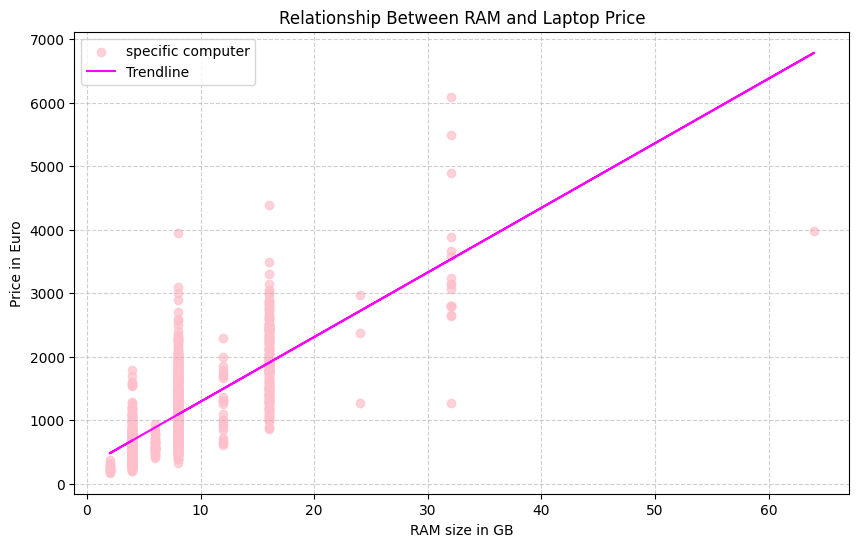

In [119]:
#creating a scatter graph representing RAM vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(data['RAM (GB)'], data['Price (Euro)'], alpha=0.7, color='pink', label='specific computer')

#add trendline to show correlation between RAM size and price, make sure it's a linear line
y_intersect = np.polyfit(data['RAM (GB)'], data['Price (Euro)'], 1)
linear_equation = np.poly1d(y_intersect)
plt.plot(data['RAM (GB)'], linear_equation(data['RAM (GB)']), color='magenta', label='Trendline')

#add titles and lables tomake the graph readable 
plt.title('Relationship Between RAM and Laptop Price')
plt.xlabel('RAM size in GB')
plt.ylabel('Price in Euro')
#create a legend to ease readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


### task 6:

In [ ]:
#extract storage type
def extract_storage_type(memory_string):
    #split the memory string into parts
    components = memory_string.split()
    filtered = []

    #filter out the components that contain "GB" or "TB"
    for word in components:
        if 'GB' not in word and 'TB' not in word:
            filtered += word

    #join unfiltered components into a single string
    res = ''.join(filtered)

    #make sure same values would not be printed twice 
    if res == 'SSD+SSD': 
        res = 'SSD'
    elif res == 'HDD+HDD':
        res = 'HDD'
    return res

#apply the function to memory column, store the result in a new one
data['Storage Type'] = data['Memory'].apply(extract_storage_type)

#tests:
#print updated DataFrame
print(data['Storage Type'].unique()) 
#print datas first 5 rows to make sure column added correctly 
data.head()

['SSD' 'FlashStorage' 'HDD' 'SSD+HDD' 'Hybrid' 'FlashStorage+HDD'
 'SSD+Hybrid']


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macos,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macos,1.34,898.94,FlashStorage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,no os,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macos,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macos,1.37,1803.60,SSD
